In [4]:
setwd("C:/Users/Info/Documents/R")
jet <- read.csv("jet.csv")

# 1. 계층적 군집분석

## A. FFD와 CAR를 제외한 변수를 표준화 한 후 
## 계층적 군집화를 시행하고 덴드로그램을 그리시오.

In [6]:
head(jet)

X,FFD,SPR,RGF,PLF,SLF,CAR
FH-1,82,1.468,3.30,0.166,0.1,no
FJ-1,89,1.605,3.64,0.154,0.1,no
F-86A,101,2.168,4.87,0.177,2.9,yes
F9F-2,107,2.054,4.72,0.275,1.1,no
F-94A,115,2.467,4.11,0.298,1.0,yes
F3D-1,122,1.294,3.75,0.150,0.9,no


In [7]:
summary(jet)

       X           FFD             SPR             RGF             PLF        
 F-100A : 1   Min.   : 82.0   Min.   :0.455   Min.   :3.300   Min.   :0.0000  
 F-101A : 1   1st Qu.:123.2   1st Qu.:2.172   1st Qu.:4.005   1st Qu.:0.1222  
 F-102A : 1   Median :174.5   Median :3.258   Median :4.515   Median :0.1605  
 F-104B : 1   Mean   :166.3   Mean   :3.944   Mean   :4.577   Mean   :0.1683  
 F-105B : 1   3rd Qu.:192.8   3rd Qu.:6.024   3rd Qu.:4.973   3rd Qu.:0.2132  
 F-106A : 1   Max.   :328.0   Max.   :8.548   Max.   :6.450   Max.   :0.3660  
 (Other):16                                                                   
      SLF         CAR    
 Min.   :0.100   no :11  
 1st Qu.:1.850   yes:11  
 Median :2.670           
 Mean   :2.265           
 3rd Qu.:2.900           
 Max.   :3.500           
                         

In [8]:
jet2=jet
rownames(jet2)=jet2[,1]
jet2=jet2[,-c(1,2,7)]
jet2_s=as.data.frame(scale(jet2))

In [19]:
dist(jet_s, method="manhattan")
mahalanobis(jet_s,colMeans(jet_s), cov(jet_s))

            1          2          3          4          5          6          7
2   0.7708209                                                                  
3   2.8413460  2.3474841                                                       
4   3.8302701  3.3364083  1.4836517                                            
5   3.6005458  3.1066840  2.7778220  1.3904856                                 
6   1.5582403  0.9031667  2.5369946  3.3151751  2.8044593                      
7   3.8977507  3.1269298  3.7007575  4.5752533  3.9555492  2.4865179           
8   3.7289147  2.9580938  1.7257858  2.6002816  3.2095581  2.3176819  2.5315147
9   2.4667635  1.7190226  2.6150610  3.4895567  2.6299093  1.1709303  2.4916911
10  5.2588777  4.4880569  2.6714109  3.9443190  4.7048815  3.8476450  4.5461561
11  4.5820974  4.0882356  4.5296374  3.7423789  2.8827315  3.5401434  4.9140258
12  4.1615199  3.3906991  3.0348981  3.9093939  3.6075237  2.7502872  3.5641979
13  5.2243411  4.7304793  3.4014625  4.2

[1]  3.0724517  2.0558239  4.0916329  5.0724920  3.6797556  2.0316733
 [7]  4.9187294  0.9142775  1.5109379  0.8905260  2.9423315  0.6333493
[13]  1.2199000  1.6830768  1.8639411  7.3703247  4.5002166  6.2587059
[19]  4.0598711  5.5447224  8.0426454 11.6426148

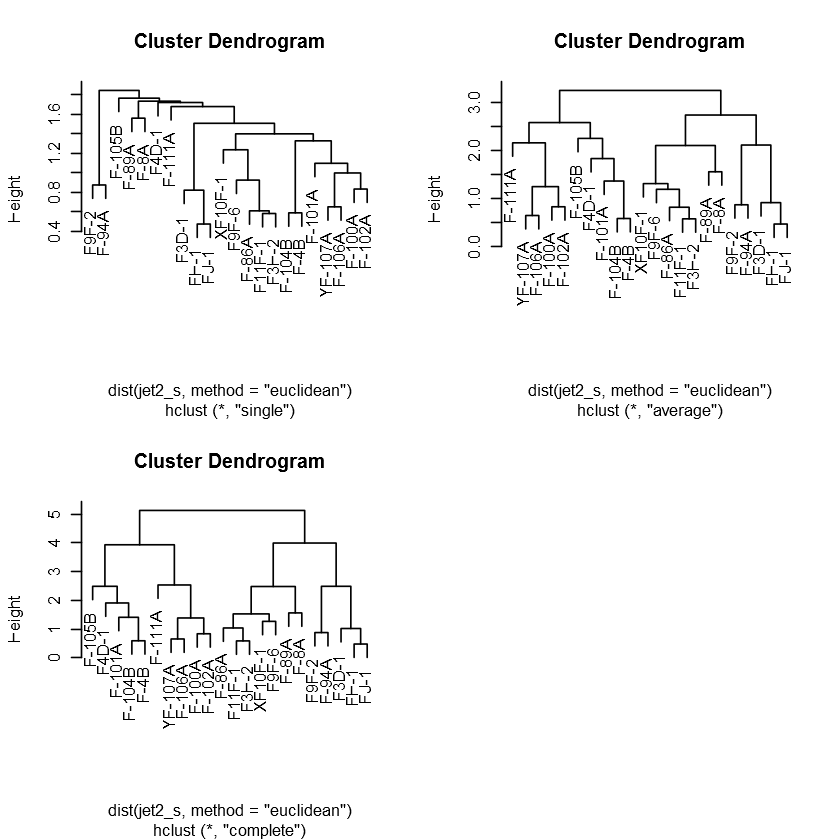

In [24]:
par(mfcol=c(2,2))

hcjet1=hclust(dist(jet2_s, method="euclidean"),method="single")
plot(hcjet1)

hcjet2=hclust(dist(jet2_s, method="euclidean"),method="complete")
plot(hcjet2)

hcjet3=hclust(dist(jet2_s, method="euclidean"),method="average")
plot(hcjet3)

## B.	A의 결과를 사용해 두 개의 집단으로 관측치를 분류하고 
## 각 집단의 특징을 원변수 관점에서 비교하시오.

In [23]:
jet2_s$cluster=cutree(hcjet2,k=2)
jet2_s

,SPR,RGF,PLF,SLF,cluster
FH-1,-1.04614198,-1.69627044,-0.02622718,-2.15830567,1
FJ-1,-0.98826834,-1.24473653,-0.16470671,-2.15830567,1
F-86A,-0.75043723,0.38875379,0.10071238,0.63245061,1
F9F-2,-0.79859486,0.18954766,1.23162849,-1.16160700,1
F-94A,-0.62412905,-0.62055730,1.49704758,-1.26127686,1
F3D-1,-1.11964574,-1.09865203,-0.21086655,-1.36094673,1
F-89A,-0.74410070,-0.80648303,-1.94186060,0.13410128,1
XF10F-1,-0.64144890,0.09658479,-0.59168524,-0.46391793,1
F9F-6,-0.56498810,-0.97912835,-0.15316675,0.03443141,1
F-100A,0.26298522,0.45515584,-0.34934607,0.93146021,2


In [25]:
hcjet2_result <- cutree(hcjet2,k=2)

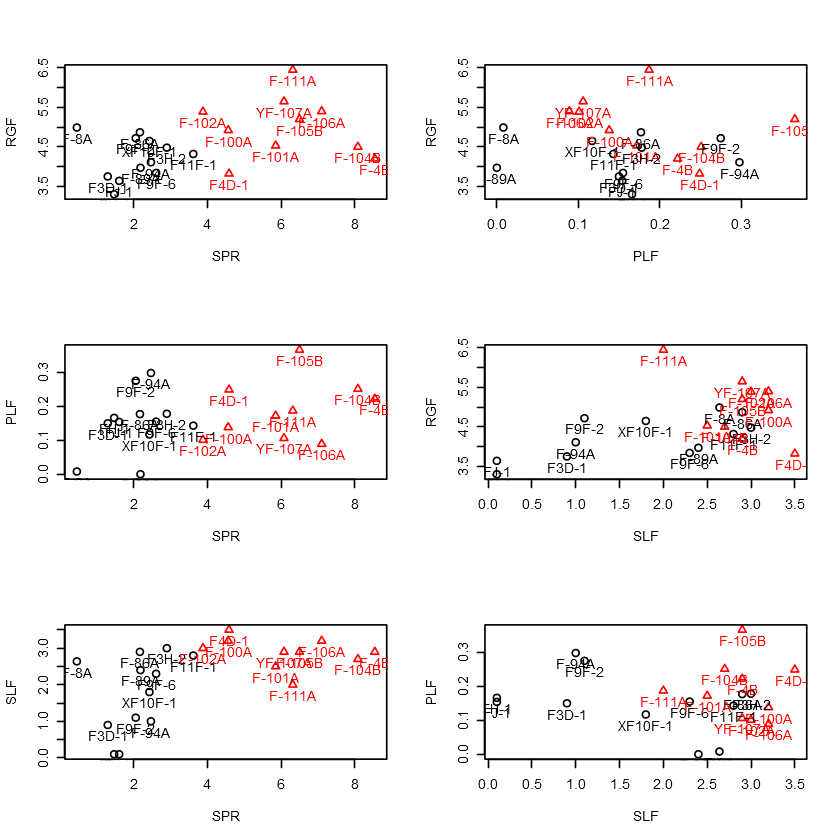

In [27]:
par(mfcol=c(3,2))

plot(jet$SPR, jet$RGF, col=hcjet2_result, pch=hcjet2_result, xlab="SPR", ylab="RGF")
text(jet$SPR, jet$RGF, labels= rownames(jet2), col=hcjet2_result, pos=1)

plot(jet$SPR, jet$PLF, col=hcjet2_result, pch=hcjet2_result, xlab="SPR", ylab="PLF")
text(jet$SPR, jet$PLF, labels= rownames(jet2), col=hcjet2_result, pos=1)

plot(jet$SPR, jet$SLF, col=hcjet2_result, pch=hcjet2_result, xlab="SPR", ylab="SLF")
text(jet$SPR, jet$SLF, labels= rownames(jet2), col=hcjet2_result, pos=1)


plot(jet$PLF, jet$RGF, col=hcjet2_result, pch=hcjet2_result, xlab="PLF", ylab="RGF")
text(jet$PLF, jet$RGF, labels= rownames(jet2), col=hcjet2_result, pos=1)

plot(jet$SLF, jet$RGF, col=hcjet2_result, pch=hcjet2_result, xlab="SLF", ylab="RGF")
text(jet$SLF, jet$RGF, labels= rownames(jet2), col=hcjet2_result, pos=1)

plot(jet$SLF, jet$PLF, col=hcjet2_result, pch=hcjet2_result, xlab="SLF", ylab="PLF")
text(jet$SLF, jet$PLF, labels= rownames(jet2), col=hcjet2_result, pos=1)

## C. 두 집단을 주성분을 이용해 2차원 산점도로 표현하시오. 
## (즉, 제1 주성분과 제2 주성분을 사용한 산점도에서 두 개의 집단을 
## 서로 다른 마크와 색으로 표현하시오.)

In [10]:
library(ggplot2)
library(psych)

Warning message:
"package 'ggplot2' was built under R version 3.3.2"Warning message:
"package 'psych' was built under R version 3.3.2"
Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha



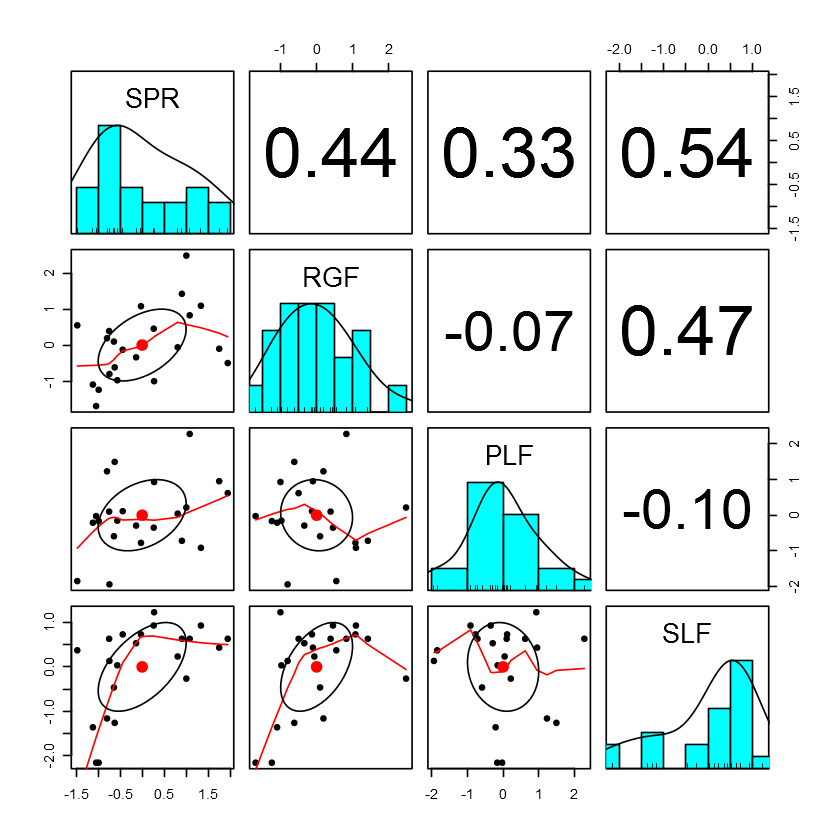

In [11]:
pairs.panels(jet2_s[,-5])

In [12]:
pca=prcomp(jet2_s[,-5])
pca

Standard deviations:
[1] 1.4064330 1.0778969 0.7421941 0.5560867

Rotation:
          PC1        PC2        PC3        PC4
SPR 0.6011860 -0.3052264  0.1840062 -0.7152300
RGF 0.5408329  0.2456147 -0.7910625  0.1462644
PLF 0.1064118 -0.8853327 -0.1215182  0.4359998
SLF 0.5785773  0.2503921  0.5706094  0.5262670

In [13]:
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.4064 1.0779 0.7422 0.55609
Proportion of Variance 0.4945 0.2905 0.1377 0.07731
Cumulative Proportion  0.4945 0.7850 0.9227 1.00000

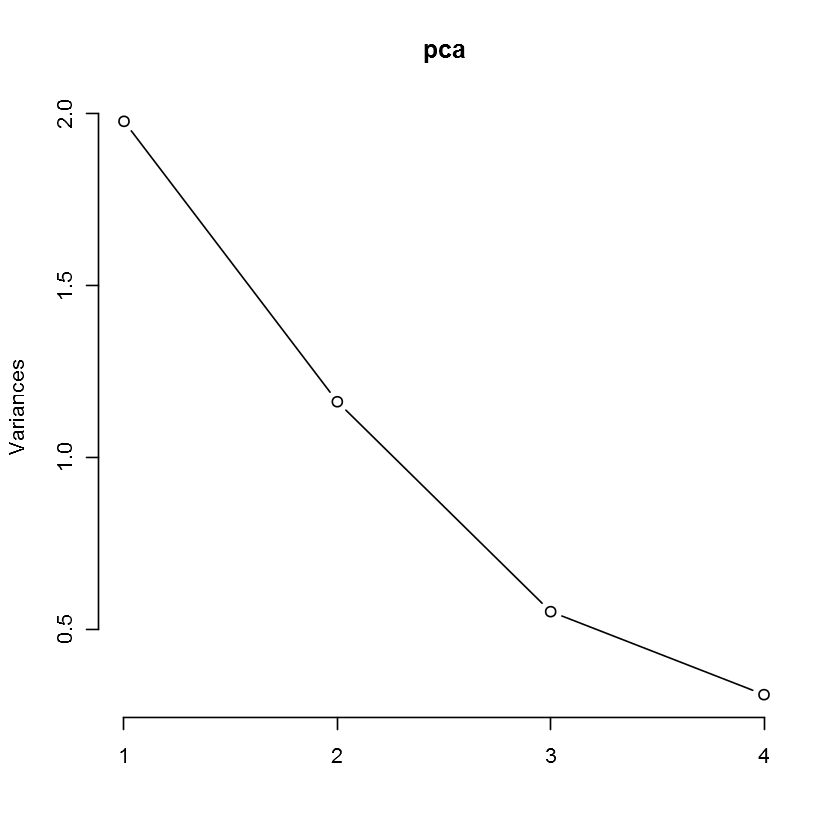

In [14]:
plot(pca, type='l')

In [15]:
pca$rotation

,PC1,PC2,PC3,PC4
SPR,0.6011860,-0.3052264,0.1840062,-0.7152300
RGF,0.5408329,0.2456147,-0.7910625,0.1462644
PLF,0.1064118,-0.8853327,-0.1215182,0.4359998
SLF,0.5785773,0.2503921,0.5706094,0.5262670


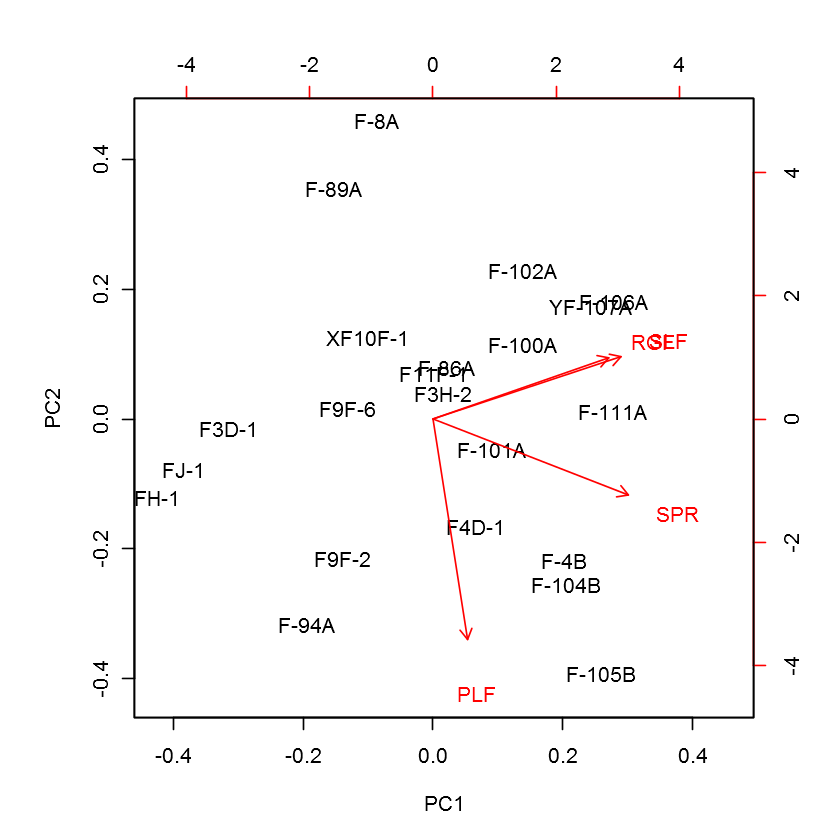

In [16]:
biplot(pca)

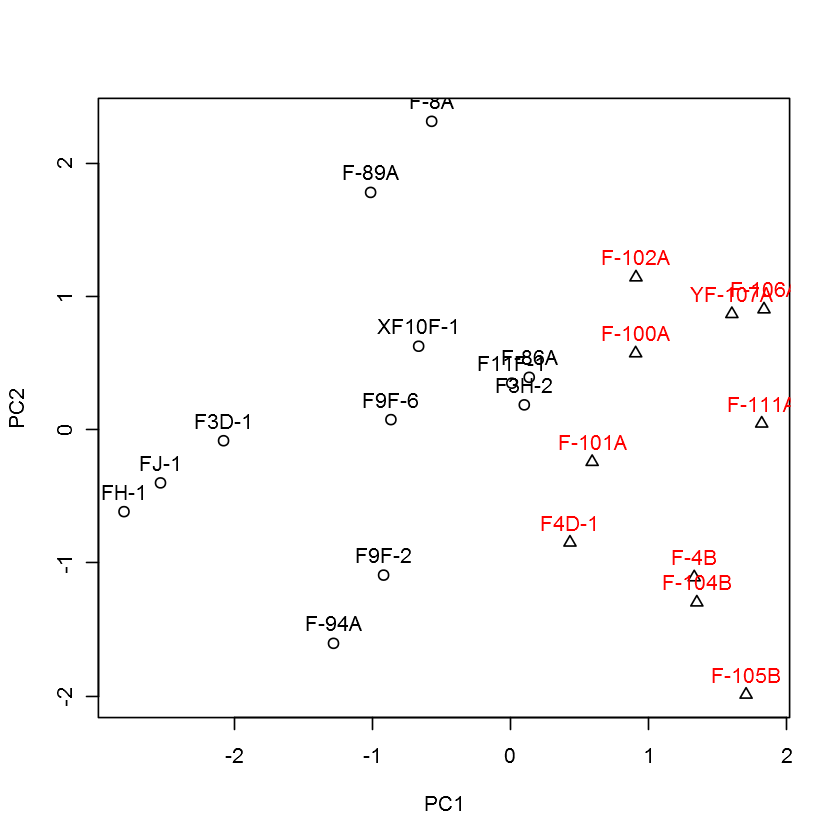

In [28]:
plot(pca$x[,1], pca$x[,2], xlab="PC1", ylab="PC2",
       pch=as.numeric(jet2_s$cluster))
text(pca$x[,1], pca$x[,2], labels=as.character(jet$X),
     cex=1, pos=3, col=as.numeric(jet2_s$cluster))